In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_train = pd.read_csv('aps_failure_train.csv')

In [0]:
data_test = pd.read_csv('aps_failure_test.csv')

In [4]:
display(data_train.head(5))

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,3256,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,320.0,14800.0,114044.0,64416.0,102.0,0.0,88808.0,0.0,0.0,0.0,0.0,0.0,182400.0,163802.0,27816.0,12172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61388.0,...,NaN,NaN,276.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255460.0,182.00,182.0,26270.0,21514.0,7660.0,3148.0,10264.0,121464.0,2944.0,158.0,260.0,0.0,0.0,0.0
1,False,3474,NaN,8.600000e+01,86.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,3360.0,165294.0,28272.0,0.0,0.0,102652.0,0.0,56.0,0.0,0.0,0.0,196058.0,182014.0,20716.0,10946.0,0.0,0.0,0.0,0.0,78.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,93644.0,...,0.0,165416.0,106.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1122.0,2226.0,426.0,0.0,0.0,5796.0,1202.0,9800.0,2672.0,0.0,0.0,0.0,0.0,2474220.0,NaN,NaN,15902.0,26396.0,23362.0,16746.0,31190.0,25052.0,18384.0,14814.0,24894.0,354.0,0.0,0.0
2,False,1332,NaN,2.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,25192.0,51490.0,17666.0,3654.0,0.0,0.0,0.0,37570.0,0.0,0.0,0.0,12546.0,17598.0,74830.0,74084.0,31356.0,4420.0,0.0,0.0,0.0,0.0,94.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0,...,0.0,73172.0,242.0,262.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1148.0,170.0,32.0,6578.0,2232.0,1798.0,258.0,3140.0,350.0,2.0,56.0,0.0,0.0,0.0,137.32,164.0,28390.0,9900.0,6520.0,3906.0,12168.0,18422.0,12824.0,5856.0,16.0,0.0,0.0,0.0
3,False,519842,NaN,2.130706e+09,1154.0,0.0,0.0,0.0,0.0,0.0,0.0,8430.0,7424.0,11730124.0,10241340.0,1080276.0,32396.0,20277900.0,36756.0,0.0,0.0,0.0,0.0,36300044.0,30541976.0,8792568.0,4611126.0,0.0,0.0,2044.0,0.0,330.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,39034.0,...,0.0,15456814.0,4816.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,386104.0,21880.0,8806.0,0.0,0.0,112888.0,24456.0,11009880.0,1209780.0,0.0,0.0,0.0,0.0,0.0,12630.02,12746.0,5591200.0,4549872.0,2847726.0,1440870.0,3660212.0,3233942.0,1023828.0,455646.0,278716.0,17978.0,0.0,0.0
4,False,712,8.0,3.800000e+01,28.0,0.0,0.0,0.0,0.0,0.0,6654.0,22806.0,57796.0,87004.0,2616.0,0.0,0.0,83020.0,0.0,0.0,0.0,4946.0,8128.0,245656.0,224276.0,132000.0,11622.0,4.0,0.0,0.0,0.0,130.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53642.0,330.0,228.0,0.0,0.0,380.0,156830.0,0.0,0.0,0.0,0.0,2028.0,146.0,26.0,0.0,0.0,2360.0,490.0,1800.0,182.0,0.0,0.0,0.0,0.0,0.0,514.52,418.0,128718.0,16464.0,8214.0,3580.0,6408.0,6366.0,3790.0,3336.0,0.0,0.0,0.0,0.0


In [5]:
display(data_test.head(5))

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,NaN,43184,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,980.0,225340.0,2125658.0,339908.0,1974.0,0.0,1365772.0,0.0,270.0,0.0,0.0,0.0,2438136.0,2213144.0,380434.0,173496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343650.0,1259068.0,...,NaN,NaN,2458.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16830.0,33088.0,6280.0,0.0,0.0,79016.0,14646.0,2485320.0,656576.0,0.0,0.0,0.0,0.0,13183300.0,NaN,NaN,488530.0,454562.0,229646.0,110134.0,211420.0,175746.0,170688.0,190998.0,618038.0,44098.0,0.0,0.0
1,NaN,1230,NaN,88.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,4640.0,52958.0,31692.0,140.0,0.0,31102.0,0.0,252.0,0.0,0.0,0.0,99428.0,87122.0,31576.0,5548.0,0.0,0.0,0.0,0.0,146.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,52858.0,...,58.0,69382.0,212.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,782.0,120.0,192.0,0.0,0.0,734.0,178.0,16580.0,1704.0,0.0,0.0,0.0,0.0,228290.0,129.80,146.0,24190.0,9862.0,2666.0,1074.0,3382.0,48444.0,14.0,0.0,0.0,0.0,0.0,0.0
2,NaN,240,0.0,18.0,2.0,0.0,0.0,0.0,0.0,0.0,2282.0,24328.0,20174.0,8466.0,0.0,0.0,0.0,19006.0,0.0,0.0,0.0,4916.0,9490.0,55782.0,39600.0,78070.0,6052.0,0.0,0.0,0.0,0.0,26.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4720.0,202.0,256.0,0.0,0.0,0.0,31212.0,0.0,0.0,0.0,0.0,1342.0,74.0,16.0,0.0,0.0,958.0,150.0,920.0,92.0,0.0,0.0,0.0,0.0,0.0,324.44,264.0,37854.0,7302.0,2612.0,624.0,1072.0,2592.0,1880.0,1308.0,6.0,0.0,0.0,0.0
3,NaN,31510,NaN,636.0,586.0,0.0,0.0,0.0,0.0,0.0,0.0,602.0,17786.0,1764998.0,370564.0,25406.0,674.0,904262.0,0.0,0.0,0.0,0.0,0.0,1964614.0,1696936.0,349852.0,219378.0,0.0,0.0,0.0,0.0,1558.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,732996.0,...,14.0,1860292.0,1994.0,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14228.0,15894.0,2772.0,0.0,0.0,54492.0,11840.0,449700.0,54256.0,1834490.0,4544.0,0.0,0.0,3658180.0,868.88,956.0,342692.0,434804.0,303108.0,128062.0,243134.0,286760.0,165538.0,120136.0,153552.0,2244.0,0.0,0.0
4,NaN,384,0.0,30.0,16.0,0.0,0.0,0.0,0.0,0.0,1502.0,22300.0,54882.0,22132.0,160.0,0.0,0.0,40846.0,0.0,284.0,0.0,5222.0,9888.0,102146.0,88042.0,59750.0,8152.0,0.0,0.0,0.0,0.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,31480.0,226.0,108.0,0.0,0.0,0.0,65870.0,0.0,0.0,0.0,0.0,1066.0,48.0,12.0,47200.0,11192.0,1094.0,386.0,500.0,50.0,18026.0,272.0,0.0,0.0,0.0,305.40,254.0,72148.0,10702.0,5902.0,3600.0,5452.0,1144.0,1520.0,464.0,44.0,0.0,0.0,0.0


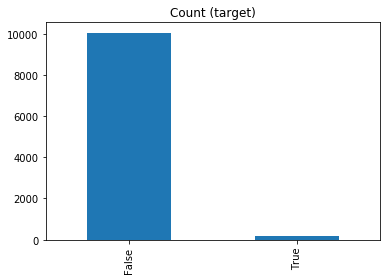

In [6]:
data_train['class'].value_counts()

target_count = data_train['class'].value_counts()
target_count.plot(kind='bar', title='Count (target)');

In [7]:
data_train['ab_000'].values
data_train['af_000'].isnull().sum()

438

In [8]:
data_train.fillna(-9999)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,...,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,False,3256,-9999.0,0.000000e+00,-9999.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0,14800.0,114044.0,64416.0,102.0,0.0,88808.0,0.0,0.0,0.0,0.0,0.0,182400.0,163802.0,27816.0,12172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61388.0,...,-9999.0,-9999.0,276.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2255460.0,182.00,182.0,26270.0,21514.0,7660.0,3148.0,10264.0,121464.0,2944.0,158.0,260.0,0.0,0.0,0.0
1,False,3474,-9999.0,8.600000e+01,86.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,3360.0,165294.0,28272.0,0.0,0.0,102652.0,0.0,56.0,0.0,0.0,0.0,196058.0,182014.0,20716.0,10946.0,0.0,0.0,0.0,0.0,78.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,93644.0,...,0.0,165416.0,106.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1122.0,2226.0,426.0,0.0,0.0,5796.0,1202.0,9800.0,2672.0,0.0,0.0,0.0,0.0,2474220.0,-9999.00,-9999.0,15902.0,26396.0,23362.0,16746.0,31190.0,25052.0,18384.0,14814.0,24894.0,354.0,0.0,0.0
2,False,1332,-9999.0,2.400000e+01,14.0,0.0,0.0,0.0,0.0,0.0,25192.0,51490.0,17666.0,3654.0,0.0,0.0,0.0,37570.0,0.0,0.0,0.0,12546.0,17598.0,74830.0,74084.0,31356.0,4420.0,0.0,0.0,0.0,0.0,94.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0,...,0.0,73172.0,242.0,262.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,1148.0,170.0,32.0,6578.0,2232.0,1798.0,258.0,3140.0,350.0,2.0,56.0,0.0,0.0,0.0,137.32,164.0,28390.0,9900.0,6520.0,3906.0,12168.0,18422.0,12824.0,5856.0,16.0,0.0,0.0,0.0
3,False,519842,-9999.0,2.130706e+09,1154.0,0.0,0.0,0.0,0.0,0.0,0.0,8430.0,7424.0,11730124.0,10241340.0,1080276.0,32396.0,20277900.0,36756.0,0.0,0.0,0.0,0.0,36300044.0,30541976.0,8792568.0,4611126.0,0.0,0.0,2044.0,0.0,330.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,39034.0,...,0.0,15456814.0,4816.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,386104.0,21880.0,8806.0,0.0,0.0,112888.0,24456.0,11009880.0,1209780.0,0.0,0.0,0.0,0.0,0.0,12630.02,12746.0,5591200.0,4549872.0,2847726.0,1440870.0,3660212.0,3233942.0,1023828.0,455646.0,278716.0,17978.0,0.0,0.0
4,False,712,8.0,3.800000e+01,28.0,0.0,0.0,0.0,0.0,0.0,6654.0,22806.0,57796.0,87004.0,2616.0,0.0,0.0,83020.0,0.0,0.0,0.0,4946.0,8128.0,245656.0,224276.0,132000.0,11622.0,4.0,0.0,0.0,0.0,130.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53642.0,330.0,228.0,0.0,0.0,380.0,156830.0,0.0,0.0,0.0,0.0,2028.0,146.0,26.0,0.0,0.0,2360.0,490.0,1800.0,182.0,0.0,0.0,0.0,0.0,0.0,514.52,418.0,128718.0,16464.0,8214.0,3580.0,6408.0,6366.0,3790.0,3336.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10225,False,28,-9999.0,8.000000e+00,8.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,3270.0,6812.0,0.0,0.0,0.0,3918.0,0.0,0.0,0.0,0.0,0.0,18852.0,16628.0,4340.0,954.0,0.0,0.0,0.0,0.0,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,9140.0,...,22.0,5466.0,66.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,0.0,0.0,0.0,0.0,240.0,70.0,1020.0,102.0,0.0,0.0,0.0,0.0,0.0,67.78,50.0,5932.0,3652.0,440.0,90.0,50.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0
10226,False,10646,-9999.0,0.000000e+00,-9999.0,0.0,0.0,0.0,0.0,138.0,20800.0,182096.0,378032.0,200290.0,6906.0,0.0,0.0,320722.0,0.0,0.0,0.0,11484.0,16548.0,782222.0,769522.0,240006.0,14656.0,0.0,0.0,0.0,0.0,0.0,0.0,38958.0,26206.0,8284.0,21792.0,6152.0,58100.0,185806.0,...,-9999.0,-9999.0,482.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1966.0,1004.0,336.0,0.0,

In [0]:
y_train = data_train['class'].copy(deep=True)

X_train = data_train.copy(deep=True)
X_train.drop(['class'], inplace=True, axis=1)
X_train = X_train.fillna(-9999)

In [0]:
class_labels_train = []
l = len(y_train)

for x in range(l):
    if y_train[x] == False:
        class_labels_train.append(0)
        
    else:
        class_labels_train.append(1)

y_train = class_labels_train   

In [0]:
y_test = data_test['class'].copy(deep=True)
X_test = data_test.copy(deep=True)
X_test.drop(['class'], inplace=True, axis=1)
X_test = X_test.fillna(-9999)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


In [15]:
X_train

array([[-3.93410591e-01,  1.82567898e+00,  2.34674444e+00, ...,
        -1.30636639e-01,  2.20867345e-01,  2.20861731e-01],
       [ 2.89127630e-01, -5.47830817e-01, -4.26121387e-01, ...,
        -1.21903295e-01,  2.20867345e-01,  2.20861731e-01],
       [-2.52816008e-01,  1.82520432e+00,  2.34674444e+00, ...,
        -1.30636639e-01,  2.20867345e-01,  2.23710497e-01],
       ...,
       [-4.04859027e-01, -5.47830817e-01,  2.34674444e+00, ...,
        -1.30636639e-01,  2.20867345e-01,  2.20861731e-01],
       [-1.61812796e-03, -5.47830817e-01, -4.26121881e-01, ...,
        -3.06475103e-02,  2.20867345e-01,  2.20861731e-01],
       [-3.26709194e-01,  1.82520432e+00,  2.34674445e+00, ...,
        -1.30636639e-01,  2.20867345e-01,  2.20861731e-01]])

In [16]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
y_pred = regressor.predict(X_val)

ll = len(y_pred)
class_labels_train1 = []


for x in range(ll):
    if y_pred[x] < 0.1:
        class_labels_train1.append(0)
        
    else:
        class_labels_train1.append(1) 

Confusion matrix:
 [[2452   62]
 [   2   42]]


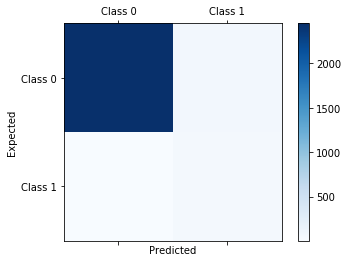

In [22]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
conf_mat = confusion_matrix(y_true=y_val, y_pred=class_labels_train1)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


In [0]:
y_pred3 = regressor.predict(X_test)

ll = len(y_pred3)
class_labels_train2 = []


for x in range(ll):
    if y_pred3[x] < 0.1:
        class_labels_train2.append('false')
        
    else:
        class_labels_train2.append('true') 

In [0]:
a = np.asarray(class_labels_train2)

prediction = pd.DataFrame(a.T)
prediction.index += 1
prediction.to_csv('prediction.csv')